In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer/Mall_Customers.csv


# **Data Preprocessing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df=pd.read_csv("//kaggle/input/mall-customer/Mall_Customers.csv")



In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**checking for null values**

In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**no null values**

In [10]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Visualizations

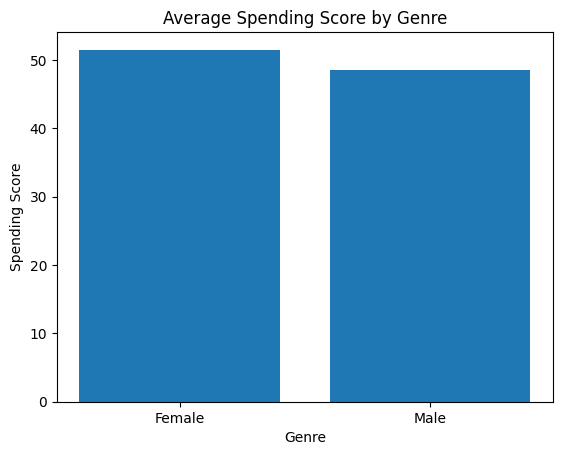

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.DataFrame(df)

# Group the data by genre and calculate the average spending score for each genre
grouped_data = df.groupby('Genre')['Spending Score (1-100)'].mean()

# Create the bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Genre')
plt.ylabel('Spending Score')
plt.title('Average Spending Score by Genre')

# Display the plot
plt.show()


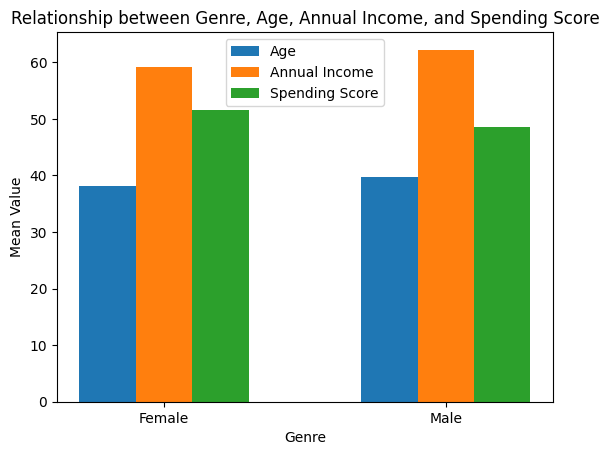

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



df = pd.DataFrame(df)

# Set up the figure and axis
fig, ax = plt.subplots()

# Group the data by Genre and calculate the mean values for Age, Annual Income, and Spending Score
grouped_data = df.groupby("Genre").mean()

# Get the unique Genre values
genres = grouped_data.index

# Set the x-axis positions
x_pos = range(len(genres))

# Plot the bar plots
bar_width = 0.2
ax.bar(x_pos, grouped_data["Age"], bar_width, label="Age")
ax.bar([pos + bar_width for pos in x_pos], grouped_data["Annual Income (k$)"], bar_width, label="Annual Income")
ax.bar([pos + bar_width*2 for pos in x_pos], grouped_data["Spending Score (1-100)"], bar_width, label="Spending Score")

# Set the labels and title
ax.set_xlabel("Genre")
ax.set_ylabel("Mean Value")
ax.set_title("Relationship between Genre, Age, Annual Income, and Spending Score")

# Set the x-axis tick positions and labels
ax.set_xticks([pos + bar_width for pos in x_pos])
ax.set_xticklabels(genres)

# Add a legend
ax.legend()

# Show the plot
plt.show()


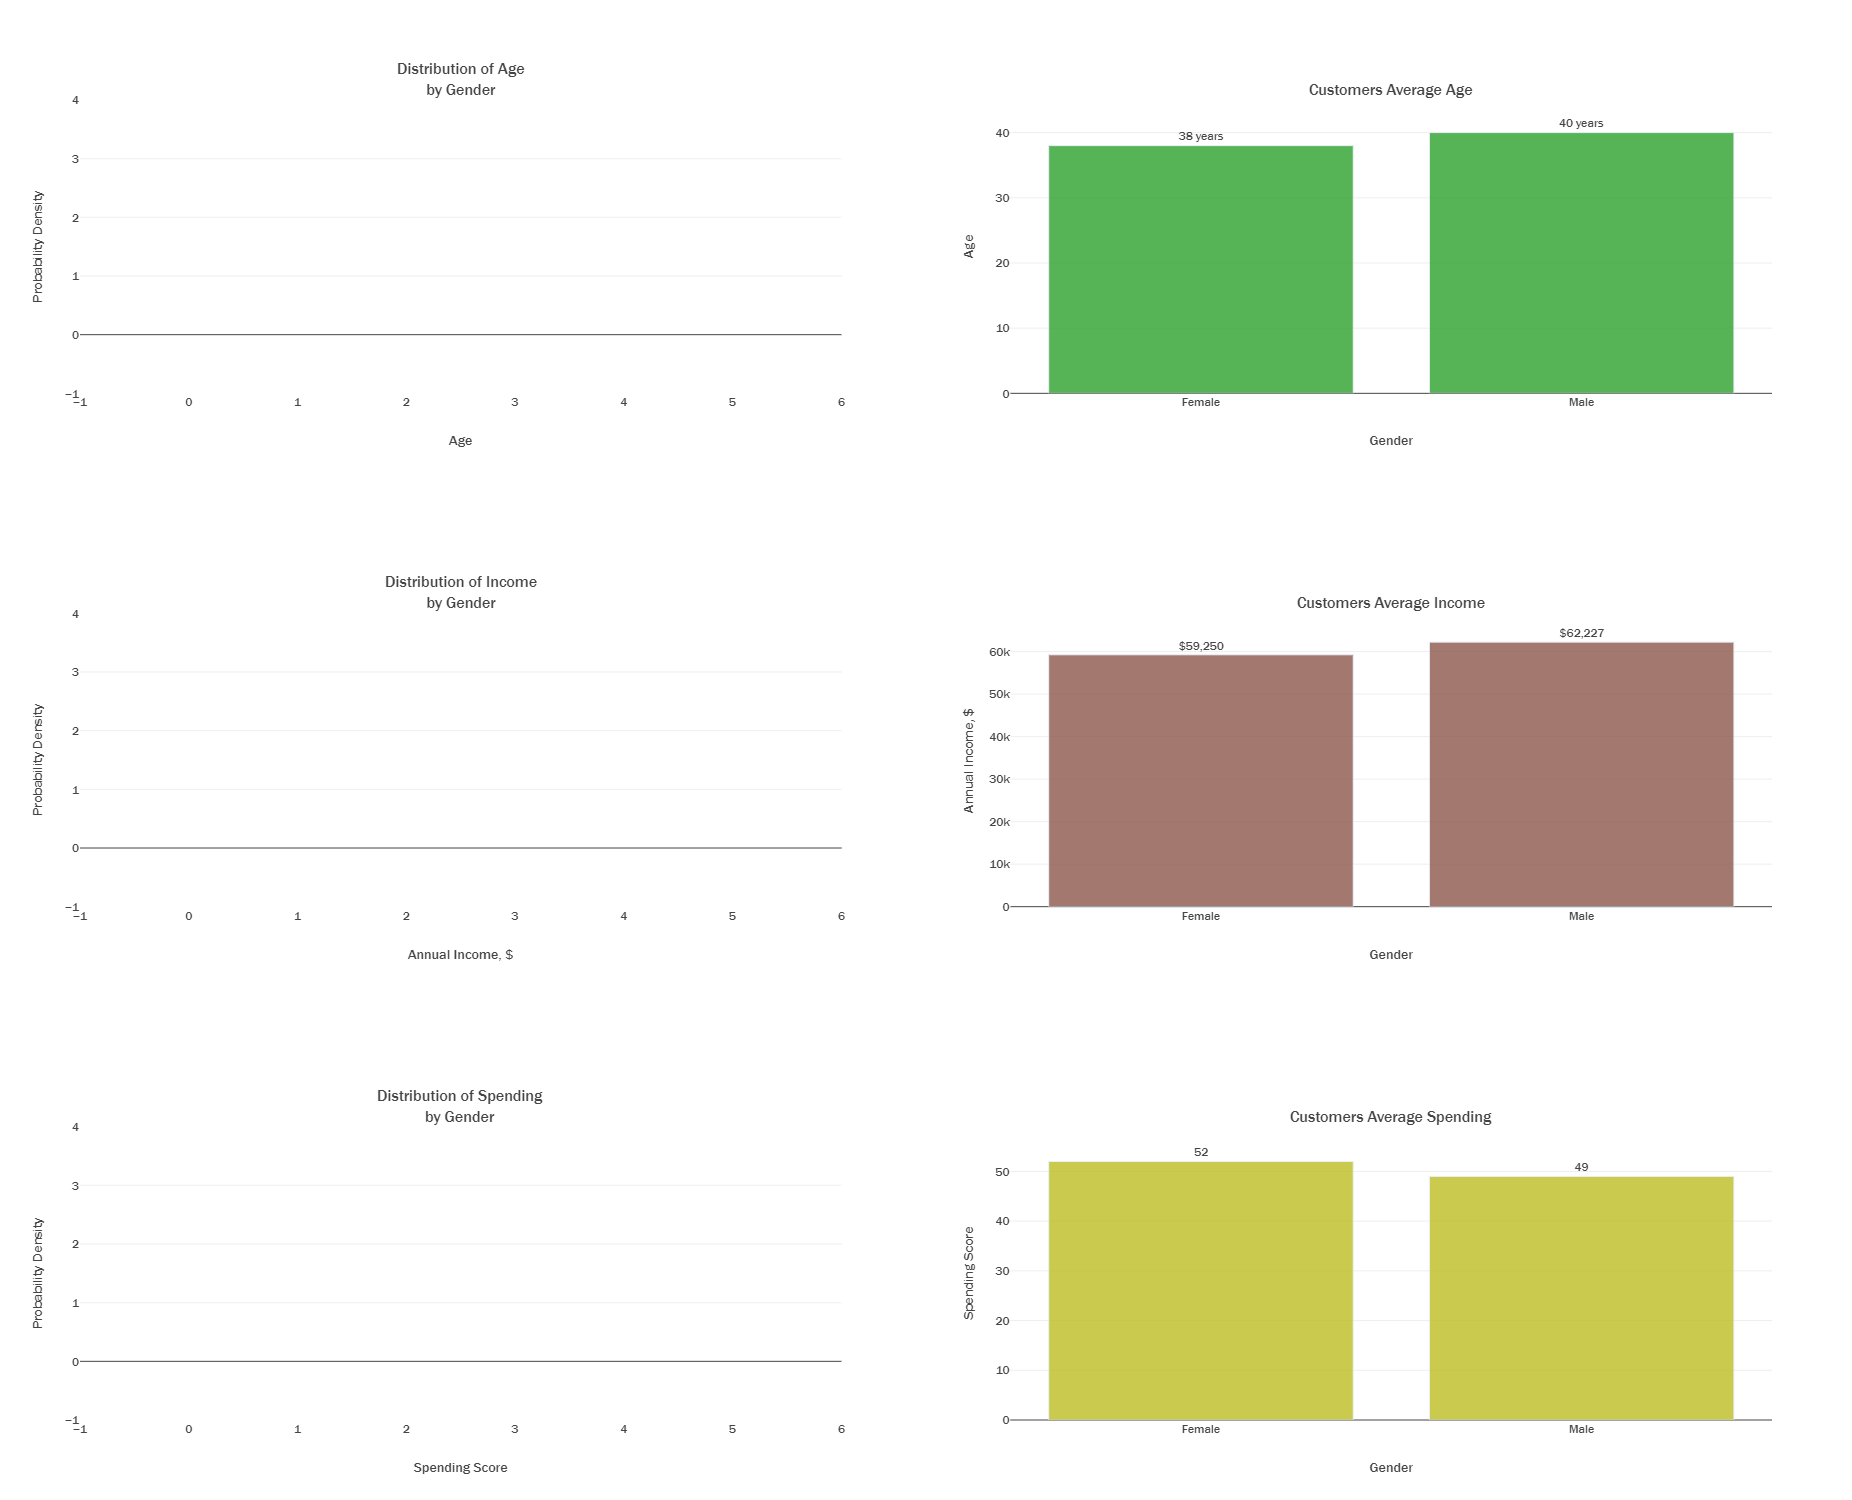

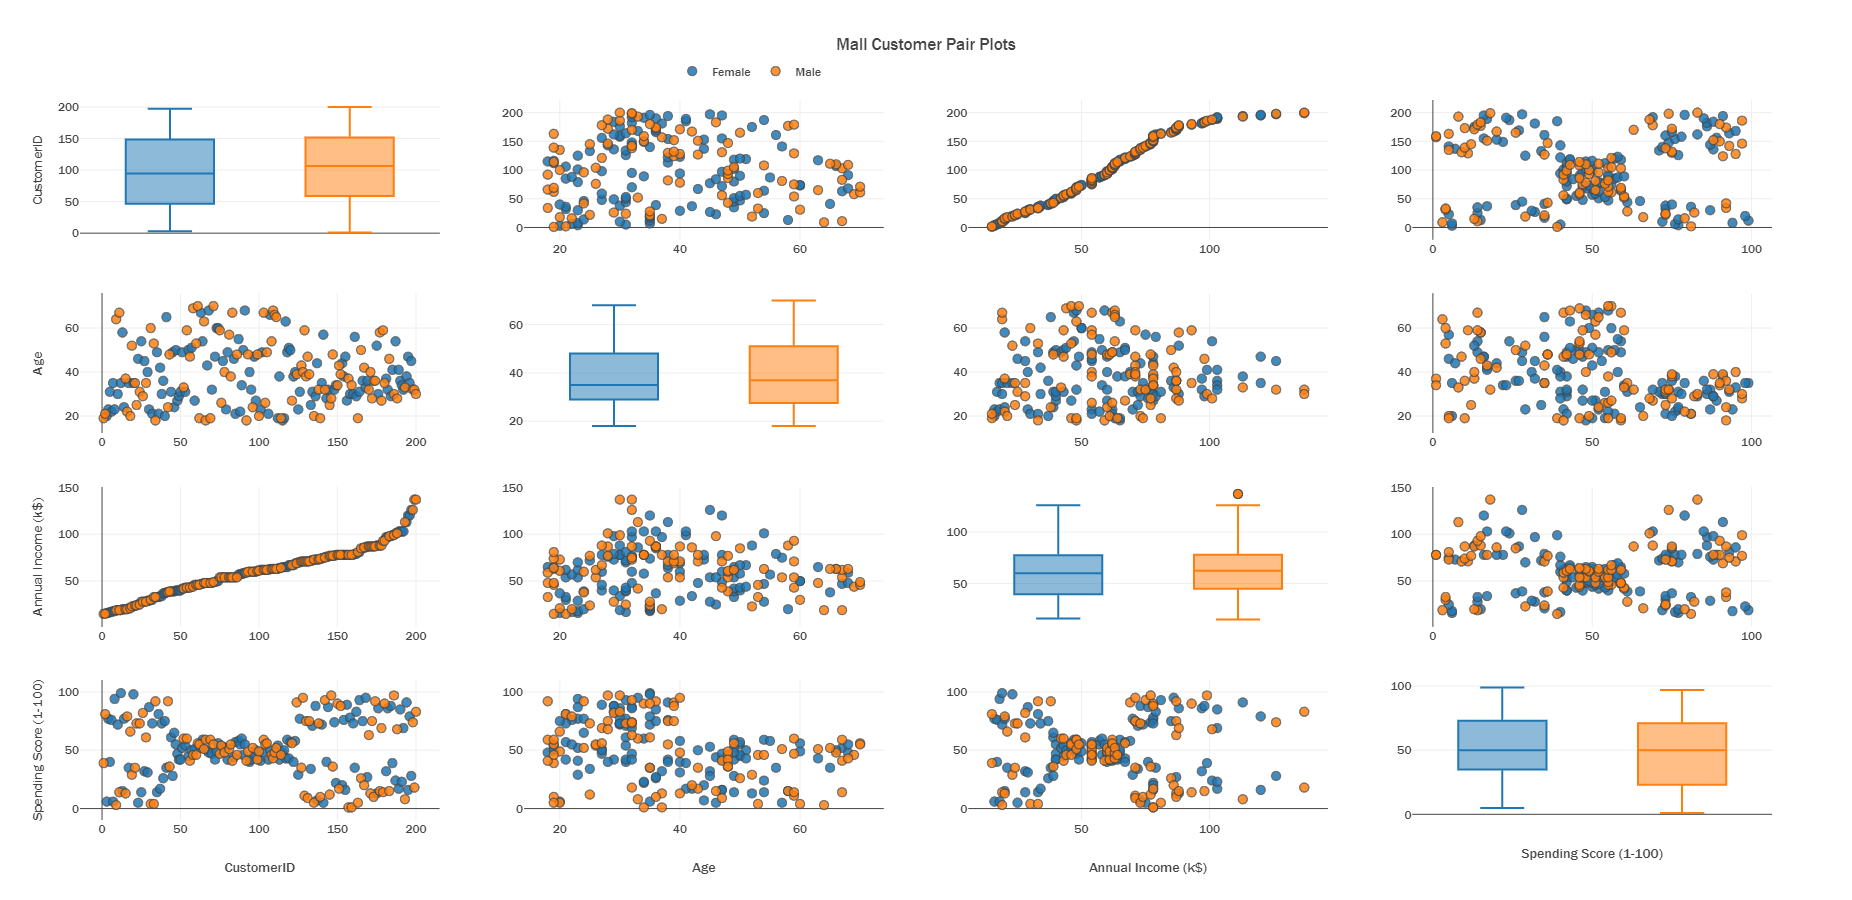

/tmp/ipykernel_34/3039455578.py:79: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



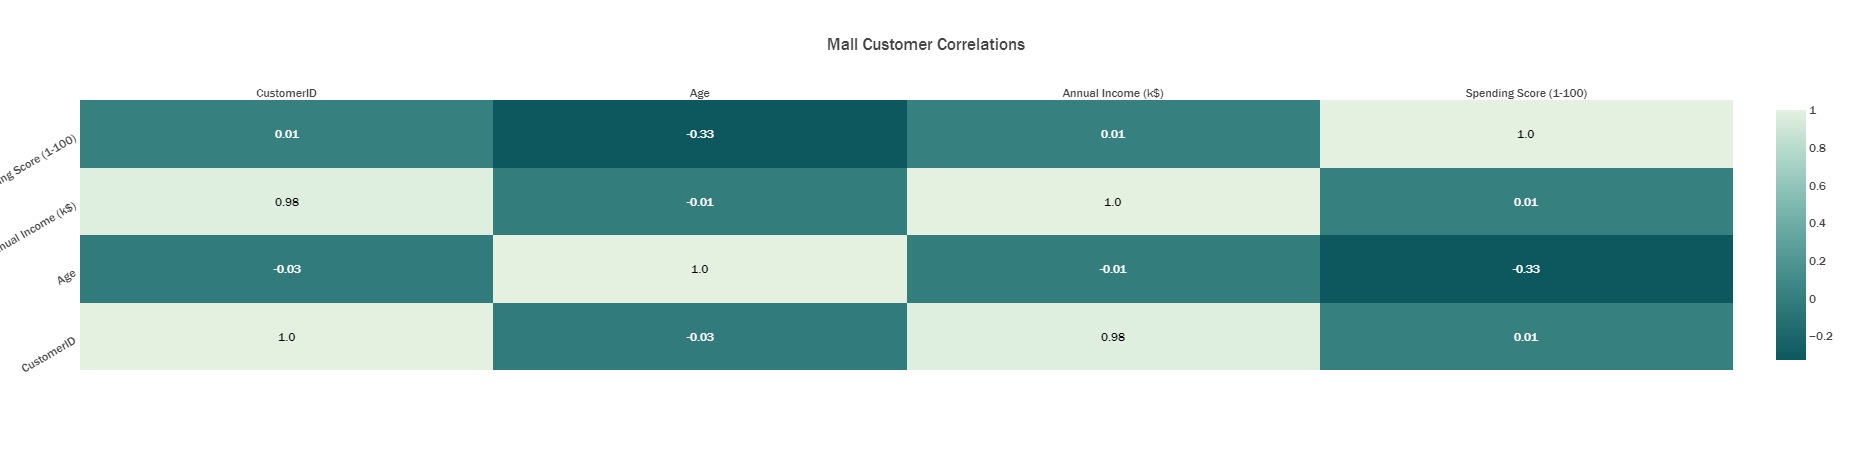

In [13]:
init_notebook_mode(connected=True)
plot_df=df.copy()
plot_df['Annual Income (k$)']=plot_df['Annual Income (k$)'].mul(1000)
p1=plot_df.groupby('Genre')['Age'].mean().round(0).astype(int).reset_index()
p2=plot_df.groupby('Genre')['Annual Income (k$)'].mean().reset_index()
p3=plot_df.groupby('Genre')['Spending Score (1-100)'].mean().round(0).astype(int).reset_index()

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Distribution of Age<br>by Gender", 
                                    "Customers Average Age",
                                    "Distribution of Income<br>by Gender", 
                                    "Customers Average Income",
                                    "Distribution of Spending<br>by Gender", 
                                    "Customers Average Spending")
                   )

fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Men']['Age'], histnorm='probability density', 
                           marker=dict(opacity=0.7, line=dict(width=1)), 
                           nbinsx=20, name="Men"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Women']['Age'], histnorm='probability density', 
                           marker=dict(opacity=0.7, line=dict(width=1)),
                           nbinsx=20, name="Women"),
              row=1, col=1)

fig.add_trace(go.Bar(x=p1['Genre'], y=p1['Age'], text=p1['Age'], texttemplate='%{text} years', textposition='outside',
                     marker=dict(opacity=0.8),width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} years<extra></extra>', showlegend=False),
              row=1, col=2)

fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Men']['Annual Income (k$)'], histnorm='probability density', 
                           marker=dict(line=dict(width=1)), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Women']['Annual Income (k$)'], histnorm='probability density', 
                           marker=dict(line=dict(width=1)),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Bar(x=p2['Genre'], y=p2['Annual Income (k$)'], text=p2['Annual Income (k$)'], 
                     texttemplate='$%{text:,.0f}', textposition='outside',
                     marker=dict(opacity=0.8),width=.8,
                     hovertemplate='Average Income Among %{x} = $%{y}<extra></extra>', showlegend=False),
              row=2, col=2)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Men']['Spending Score (1-100)'], histnorm='probability density', 
                           marker=dict(line=dict(width=1)), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Genre=='Women']['Spending Score (1-100)'], histnorm='probability density', 
                           marker=dict(line=dict(width=1)),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Bar(x=p3['Genre'], y=p3['Spending Score (1-100)'], text=p3['Spending Score (1-100)'], 
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(opacity=0.8),width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=3, col=2)
fig.update_traces(marker=dict(line=dict(width=1)))
fig.update_layout(template=temp,barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="Age", yaxis1_title='Probability Density', 
                  xaxis2_title="Gender", yaxis2_title="Age", yaxis2_range=[0,45],
                  xaxis3_title="Annual Income, $", yaxis3_title='Probability Density', 
                  xaxis4_title="Gender", yaxis4_title="Annual Income, $", yaxis4_range=[0,69e3],
                  xaxis5_title="Spending Score", yaxis5_title='Probability Density', 
                  xaxis6_title="Gender", yaxis6_title="Spending Score", yaxis6_range=[0,59]
                 )
fig.show()

# Pairplots
fig = ff.create_scatterplotmatrix(df, diag='box', index='Genre') 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1)))
fig.update_layout(title="Mall Customer Pair Plots", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=900, width=700)
fig.show()

# Correlations
corr=df.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Mall Customer Correlations", yaxis_tickangle=-30)
fig.show()


# label enconding

In [14]:
le=LabelEncoder()

In [15]:
df.Genre=le.fit_transform(df.Genre)

In [16]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Feature Scaling

In [17]:
df=df.drop("CustomerID",axis=1)


In [18]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [19]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

# Model Building

In [20]:
# dbscan=DBSCAN()

dbscan=DBSCAN(eps=0.40, min_samples=4)

dbscan.fit(df_scaled)

DBSCAN(eps=0.4, min_samples=4)

In [21]:
DBSCAN_labels=dbscan.labels_
DBSCAN_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1, -1,  1, -1, -1,  2,  1,  1,  1,  2,
       -1,  1, -1,  2, -1,  2, -1,  1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1,  1, -1,  2, -1, -1, -1,  5,  2, -1,  3,  2, -1, -1, -1,  2,  3,
        4, -1,  3, -1,  2, -1,  5,  4, -1, -1,  5,  2,  3,  4,  5,  3,  2,
       -1,  5,  4,  3, -1, -1, -1, -1, -1,  3, -1,  5,  3,  3, -1, -1,  2,
       -1,  5, -1, -1,  7, -1,  6, -1,  7, -1, -1, -1, -1, -1,  6, -1,  6,
       -1, -1, -1,  6, -1,  7, -1,  6, -1, -1, -1,  6, -1,  7, -1,  7, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1, -1, -1,  6, -1, -1,
       -1, -1, -1,  7, -1,  6, -1, -1, -1, -1, -1,  6, -1,  6, -1, -1, -1,
       -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

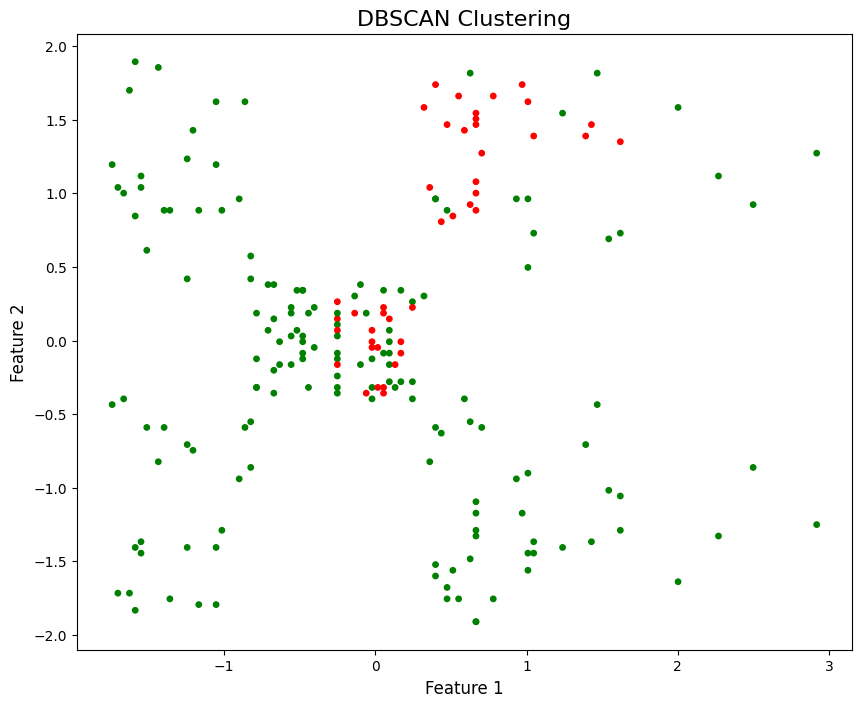

In [22]:
colors=['green','red']

# Plotting resulting clusters
plt.figure(figsize=(10,8))
plt.scatter(df_scaled[:,2],df_scaled[:,3],c=DBSCAN_labels,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=16)
plt.xlabel('Feature 1',fontsize=12)
plt.ylabel('Feature 2',fontsize=12)
plt.show()

# Conclusion

In this project, I do mall customer segmentation using DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which offers valuable insights into understanding the diverse characteristics and behaviours of customers. DBSCAN is a density-based clustering algorithm that excels at identifying clusters of arbitrary shape and effectively handles noise points.

By applying DBSCAN to mall customer data, we can identify distinct customer segments based on their spatial density and proximity. This allows us to uncover meaningful patterns and group customers with similar preferences, interests, or shopping habits together. Through DBSCAN, we can discover clusters of customers who exhibit similar shopping patterns, such as frequent visitors, occasional shoppers, or those who spend more time in specific sections of the mall. These insights can aid in tailoring marketing strategies, making personalised recommendations, and improving customer satisfaction by offering targeted promotions and enhancing the overall shopping experience.

In [23]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

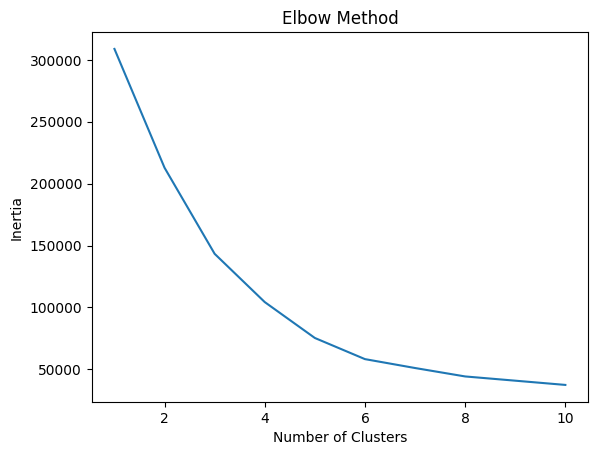

In [24]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [26]:
df['Cluster'] = kmeans.labels_


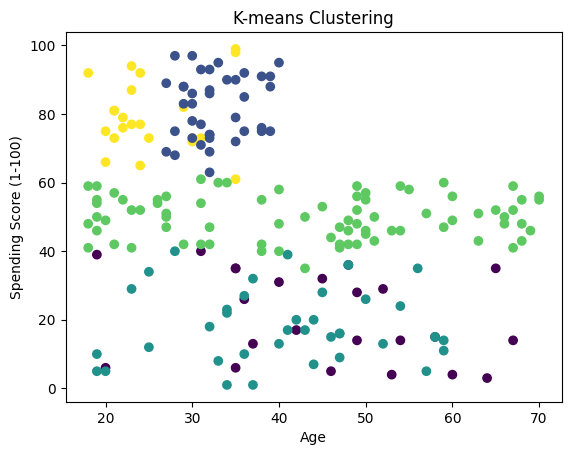

In [27]:
# Scatter plot of Age vs Spending Score with cluster labels
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()


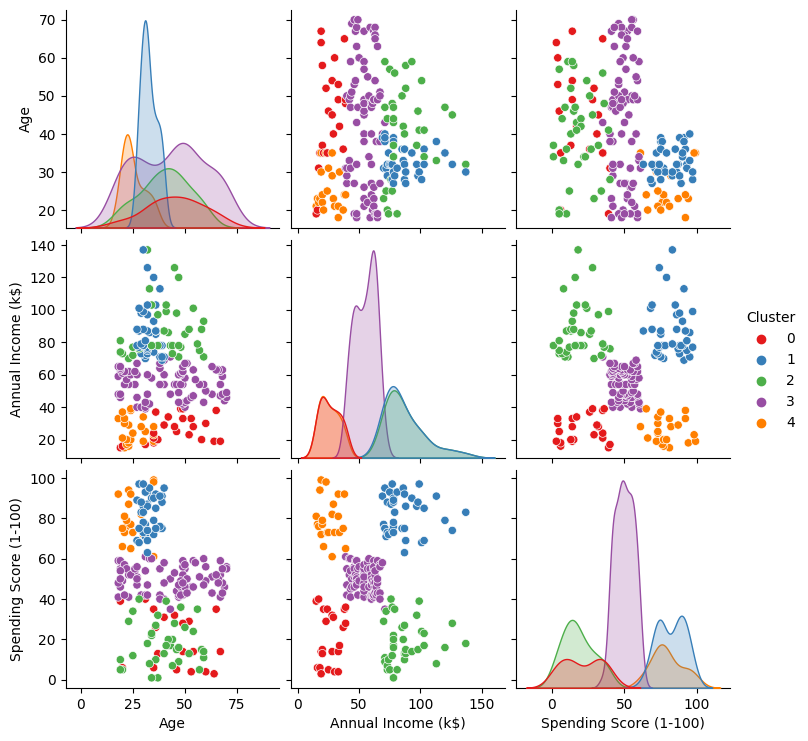

In [28]:
import seaborn as sns

# Scatter plot matrix with hue based on cluster labels
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='Set1')
plt.show()


# **Conclusion**

In this analysis, K-Means Clustering to identify distinct customer segments that the company could target depending on their needs.

Based on customer spending habits, the company could target customers for their membership card program using the two clusters found in the K-Means model, where customers have higher spending scores above 60 and would likely be more inclined to becoming a member.

One of the distinguishing factors between these clusters and the other clusters in the model is that they consist of customers who are under the age of 40, which indicates that the company could aim their membership card marketing program towards customers who are younger than 40 and have higher spending scores.

To engage customers with lower spending scores, the company could target these groups with more of their popular products and promotions. In the future, to better understand customer preferences, additional data about the frequency and types of purchases made could be used to further customize product offerings to each segment.